In [56]:
from ROOT import TFile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
font = {'family' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

# Load Data

In [26]:
data=TFile.Open("/d/grid15/ln16/pi0eta/092419/degALL_2017_vanHove_treeFlat_DSelector.root")

In [27]:
nentries=data.degALL_2017_vanHove_tree_flat.GetEntries()
Mpi0etas=np.zeros(nentries)
Mpi0ps=np.zeros(nentries)
Metaps=np.zeros(nentries)
vhxs=np.zeros(nentries)
vhys=np.zeros(nentries)
omegas=np.zeros(nentries)
ts=np.zeros(nentries)
for ievent,event in enumerate(data.degALL_2017_vanHove_tree_flat):
    Mpi0etas[ievent]=event.Mpi0eta
    omegas[ievent]=event.vanHove_omega
    Mpi0ps[ievent]=event.Mpi0p
    Metaps[ievent]=event.Metap
    vhxs[ievent]=event.vanHove_x
    vhys[ievent]=event.vanHove_y
    ts[ievent]=event.mandelstam_tp

In [28]:
dataDict={
    "Mpi0etas":Mpi0etas,
    "Mpi0ps":Mpi0ps,
    "Metaps":Metaps,
    "omegas":omegas,
    "vhxs":vhxs,
    "vhys":vhys,
    "ts":ts
         }
df_data=pd.DataFrame(dataDict)

In [59]:
df_data_omegaPito2Pi=df_data[(df_data.omegas>180) &(df_data.omegas<360)]

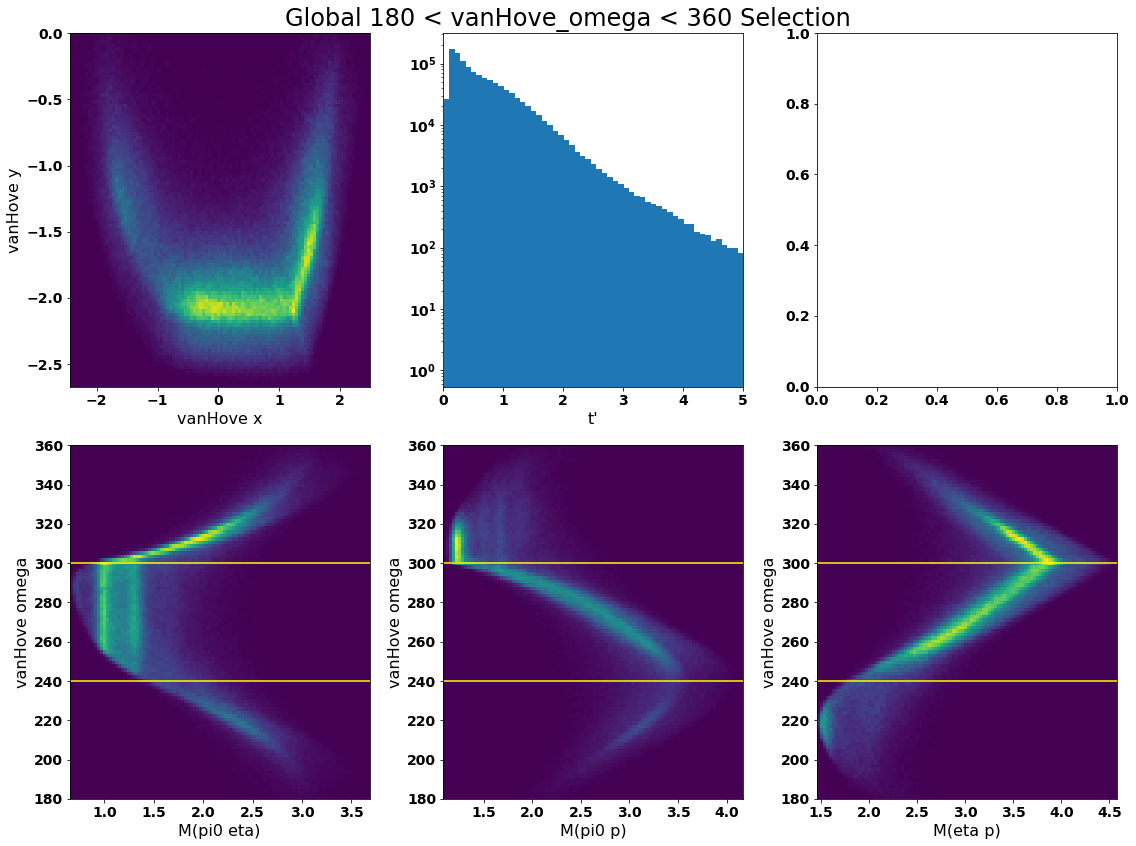

In [71]:
fig,ax=plt.subplots(2,3,figsize=(16,12))
ax=ax.flatten()
# vanHove plot
ax[0].hist2d(df_data_omegaPito2Pi.vhxs,df_data_omegaPito2Pi.vhys,bins=(100,100))
ax[0].set_xlabel("vanHove x",size=16)
ax[0].set_ylabel("vanHove y",size=16)

# mandelstam tp
ax[1].hist(df_data_omegaPito2Pi.ts,bins=100)
ax[1].set_xlim(0,5)
ax[1].set_yscale("log")
ax[1].set_xlabel("t'",size=16)

# Mpi0eta vs omega
ax[3].hist2d(df_data_omegaPito2Pi.Mpi0etas,df_data_omegaPito2Pi.omegas,bins=(100,100))
ax[3].set_xlabel("M(pi0 eta)",size=16)
ax[3].set_ylabel("vanHove omega",size=16)
ax[3].axhline(300,c="yellow")
ax[3].axhline(240,c="yellow")

# Mpi0p vs omega
ax[4].hist2d(df_data_omegaPito2Pi.Mpi0ps,df_data_omegaPito2Pi.omegas,bins=(100,100))
ax[4].set_xlabel("M(pi0 p)",size=16)
ax[4].set_ylabel("vanHove omega",size=16)
ax[4].axhline(300,c="yellow")
ax[4].axhline(240,c="yellow")

# Metap vs omega
ax[5].hist2d(df_data_omegaPito2Pi.Metaps,df_data_omegaPito2Pi.omegas,bins=(100,100))
ax[5].set_xlabel("M(eta p)",size=16)
ax[5].set_ylabel("vanHove omega",size=16)
ax[5].axhline(300,c="yellow")
ax[5].axhline(240,c="yellow")

plt.tight_layout() # need to be before adjusting otherwise it gets overwritten
plt.suptitle("Global 180 < vanHove_omega < 360 Selection", fontsize=24)
plt.subplots_adjust(top=0.95)